
# AUC with 95% CI


# Setup

In [24]:

library(readr)
library(dplyr)
library(ggplot2)


In [25]:
input_dir <- "../8_ROC/AUC_CI_DeLong_summary_merged.txt"              # CHANGE THIS
output_dir <- "../8_ROC"                                # CHANGE THIS

# Data wrangling

In [26]:

# Input file
df <- readr::read_tsv(input_dir, show_col_types = FALSE)      

# Defining and filtering relationships
rel_order <- c("HS", "GPGC", "UNI", "FC")
df_plot <- df %>%
  filter(source_file %in% rel_order) %>%
  droplevels()

# Ensuring allmarkers are read (23aSTR vs 23astr, 27aSTR vs 27astr)
df_plot <- df_plot %>%
  mutate(
    Panel_std = dplyr::case_when(
      Panel %in% c("23aSTR", "23astr") ~ "23aSTR",
      Panel %in% c("27aSTR", "27astr") ~ "27aSTR",
      TRUE ~ Panel
    )
  )

# Order of marker panels in legend
panel_levels <- c(
  "23aSTR",
  "27aSTR",
  "90iisnp",
  "94iisnp",
  "23astr-90iisnp",
  "23astr-94iisnp",
  "27astr-94iisnp"
)

# Label of marker panels in legend
panel_labels <- c(
  "23aSTR",
  "27aSTR",
  "90iiSNP",
  "94iiSNP",
  "23aSTR + 90iiSNP",
  "23aSTR + 94iiSNP",
  "27aSTR + 94iiSNP"
)

# Reorders marker panels and relationship for the plot
df_plot <- df_plot %>%
  mutate(
    Panel_std   = factor(Panel_std,   levels = panel_levels),
    source_file = factor(source_file, levels = rel_order)
  )

print(table(df_plot$Panel_std, df_plot$source_file))

                
                 HS GPGC UNI FC
  23aSTR          1    1   1  1
  27aSTR          1    1   1  1
  90iisnp         1    1   1  1
  94iisnp         1    1   1  1
  23astr-90iisnp  1    1   1  1
  23astr-94iisnp  1    1   1  1
  27astr-94iisnp  1    1   1  1


# Creating Plot

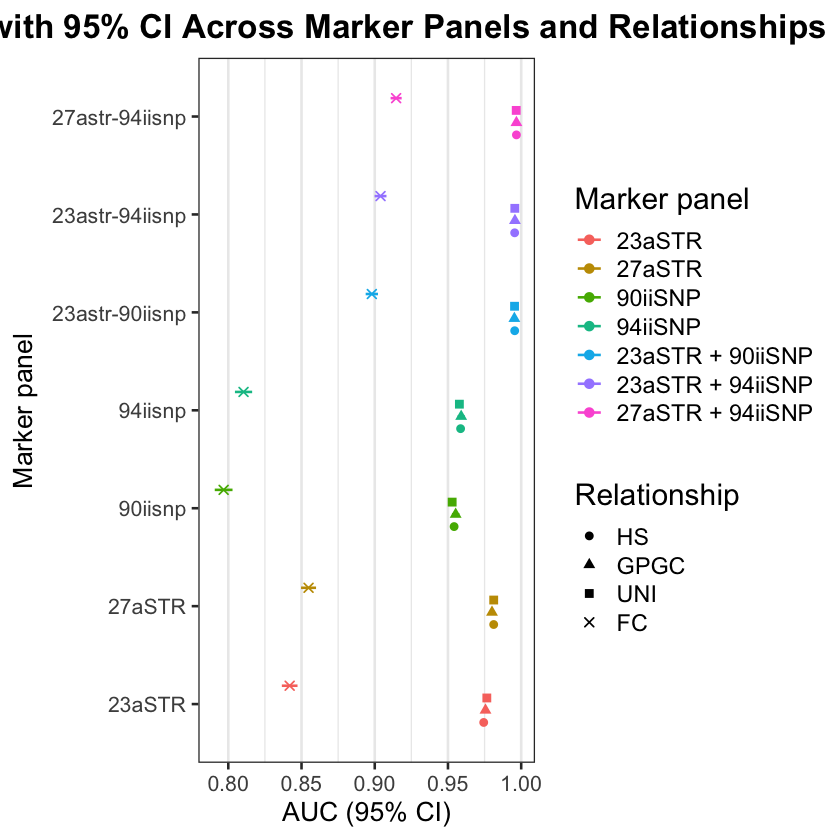

In [27]:
# colour = marker panel
# shape = relationship

dodge <- position_dodge(width = 0.5)

p_all <- ggplot(
  df_plot,
  aes(x = AUC, y = Panel_std, colour = Panel_std, shape = source_file)
) +
  geom_point(size = 2, position = dodge) +
  geom_errorbarh(
    aes(xmin = AUC_CI_lower, xmax = AUC_CI_upper, group = source_file),
    width = 0,
    position = dodge
  ) +
  scale_x_continuous("AUC (95% CI)", limits = c(0.79, 0.999)) +
  ylab("Marker panel") +
  scale_colour_discrete(
    name   = "Marker panel",
    breaks = panel_levels,
    labels = panel_labels
  ) +
  scale_shape_manual(
    name   = "Relationship",
    values = c(16, 17, 15, 4) # HS, GPGC, UNI, FC
  ) +
  labs(title = "AUC with 95% CI Across Marker Panels and Relationships") +
  theme_bw(base_size = 16) +
  theme(
    panel.grid.major.y = element_blank(),
    legend.position = "right",
    legend.title = element_text(size = 18),
    legend.text  = element_text(size = 14),
    plot.title   = element_text(size = 20, face = "bold", hjust = 0.5)
  )

p_all

# Saving Plot

In [28]:

output_png <- file.path(output_dir, paste0("AUC_with_95CI_HS GPGC UNI FC.png"))
ggsave(output_png, p_all, width = 25, height = 6, dpi = 300)
output_png

[1] "../8_ROC/AUC_with_95CI_HS GPGC UNI FC.png"